# cisTopic visualisation: enrichment of motifs in topics

from HOMER analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib as mpl
from scipy.io import mmread
import math
import scipy
import matplotlib.pyplot as plt

In [2]:
# topics 1, 2, ..., 18
topics = [str(i) for i in range(1,19)]

topic_motifs = glob.glob('./HOMER_on_topics/homer_finmotifsgenome_topic_*/knownResults.txt')

dfs = []

dfs_full = {}

for m in topic_motifs:
    #print(m)
    en_mtf = pd.read_table(m)
    #print('columns',en_mtf.columns)
    #print(en_mtf)
    topic_number = m.split('/')[2].split('_')[-1]
    dfs_full[topic_number] = en_mtf
    en_mtf['P-value'] = en_mtf['P-value'].astype(float)
    en_mtf = en_mtf[en_mtf['P-value'] < 1e-10]
    df = pd.DataFrame(data=en_mtf['P-value'].values,
                      columns = [topic_number],
                      index=en_mtf['Motif Name'])
    dfs.append(df)

mtf_mtx = pd.concat(dfs, axis=1, join='outer', sort=True)

In [3]:
dfs_full['1']

,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 685),% of Target Sequences with Motif,# of Background Sequences with Motif(of 47048),% of Background Sequences with Motif
0,SpiB(ETS)/OCILY3-SPIB-ChIP-Seq(GSE56857)/Homer,AAAGRGGAAGTG,1.000000e-77,-179.5,0.0,209.0,30.51%,3156.9,6.71%
1,PU.1(ETS)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,AGAGGAAGTG,1.000000e-61,-140.7,0.0,270.0,39.42%,6474.1,13.77%
2,PU.1:IRF8(ETS:IRF)/pDC-Irf8-ChIP-Seq(GSE66899)...,GGAAGTGAAAST,1.000000e-59,-136.0,0.0,159.0,23.21%,2338.4,4.97%
3,Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,NNATGASTCATH,1.000000e-54,-124.5,0.0,247.0,36.06%,5971.2,12.70%
4,Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,DATGASTCATHN,1.000000e-53,-123.0,0.0,275.0,40.15%,7304.5,15.54%
...,...,...,...,...,...,...,...,...,...
989,AT4G12670(MYBrelated)/col-AT4G12670-DAP-Seq(GS...,AGGGTTTAGGGTTTA,1.000000e+00,0.0,1.0,0.0,0.00%,6.1,0.01%
990,AT4G27900(C2C2COlike)/col-AT4G27900-DAP-Seq(GS...,TCTCVACCGTTSATT,1.000000e+00,0.0,1.0,0.0,0.00%,46.5,0.10%
991,DEL1(E2FDP)/colamp-DEL1-DAP-Seq(GSE60143)/Homer,TTCCCGCCAA,1.000000e+00,0.0,1.0,0.0,0.00%,25.9,0.06%
992,WRKY17(WRKY)/colamp-WRKY17-DAP-Seq(GSE60143)/H...,GCGTTGACTTTT,1.000000e+00,0.0,1.0,0.0,0.00%,88.2,0.19%


In [4]:
mtf_mtx.columns

Index(['1', '4', '12', '18', '9', '3', '10', '17', '8', '2', '15', '7', '5',
       '11', '6', '13', '16', '14'],
      dtype='object')

In [5]:
mtf_mtx

,1,4,12,18,9,3,10,17,8,2,15,7,5,11,6,13,16,14
ABR1(AP2EREBP)/colamp-ABR1-DAP-Seq(GSE60143)/Homer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANAC094(NAC)/col-ANAC094-DAP-Seq(GSE60143)/Homer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,1.000000e-46,NaN,1.000000e-38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-32,NaN,1.000000e-38,NaN,NaN,NaN,NaN
AT1G28160(AP2EREBP)/colamp-AT1G28160-DAP-Seq(GSE60143)/Homer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-11,1.000000e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1G71450(AP2EREBP)/col-AT1G71450-DAP-Seq(GSE60143)/Homer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YY1(Zf)/Promoter/Homer,NaN,1.000000e-14,NaN,NaN,1.000000e-19,NaN,NaN,1.000000e-23,1.000000e-23,1.000000e-21,NaN,NaN,1.000000e-11,NaN,NaN,1.000000e-11,1.000000e-11,1.000000e-11
ZBTB33(Zf)/GM12878-ZBTB33-ChIP-Seq(GSE32465)/Homer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-11,NaN,NaN
Zfp57(Zf)/H1-ZFP57.HA-ChIP-Seq(GSE115387)/Homer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bZIP50(bZIP)/colamp-bZIP50-DAP-Seq(GSE60143)/Homer,NaN,NaN,NaN,1.000000e-11,1.000000e-23,NaN,1.000000e-21,1.000000e-13,1.000000e-30,1.000000e-30,NaN,1.000000e-13,NaN,1.000000e-12,NaN,1.000000e-12,NaN,NaN


In [6]:
for topic in topics:
    dfs_full[topic]['target_percent'] = dfs_full[topic]['% of Target Sequences with Motif'].apply(lambda x: x[:-1])
    dfs_full[topic]['background_percent'] = dfs_full[topic]['% of Background Sequences with Motif'].apply(lambda x: x[:-1])
    dfs_full[topic]['target_percent'] = dfs_full[topic]['target_percent'].astype('float')
    dfs_full[topic]['background_percent'] = dfs_full[topic]['background_percent'].astype('float')

In [7]:
print(dfs_full['1'].dtypes)

Motif Name                                         object
Consensus                                          object
P-value                                           float64
Log P-value                                       float64
q-value (Benjamini)                               float64
# of Target Sequences with Motif(of 685)          float64
% of Target Sequences with Motif                   object
# of Background Sequences with Motif(of 47048)    float64
% of Background Sequences with Motif               object
target_percent                                    float64
background_percent                                float64
dtype: object


In [8]:
for topic in topics:
    dfs_full[topic]['target_percent'].astype('float')
    dfs_full[topic]['background_percent'].astype('float')
    dfs_full[topic].eval('score = (target_percent / background_percent)', inplace=True)
    

In [9]:
topics = [str(i) for i in range(1,19)]

topic_motifs = glob.glob('./HOMER_on_topics/homer_finmotifsgenome_topic_*/knownResults.txt')

dfs_pvals = []

dfs_scores = []

for m in topic_motifs:
    print(m)
    topic_number = m.split('/')[2].split('_')[-1]
    en_mtf = pd.read_table(m)
    print('columns',en_mtf.columns)
    
    en_mtf['target_percent'] = dfs_full[topic_number]['% of Target Sequences with Motif'].apply(lambda x: x[:-1])
    en_mtf['background_percent'] = dfs_full[topic_number]['% of Background Sequences with Motif'].apply(lambda x: x[:-1])
    en_mtf['target_percent'] = dfs_full[topic_number]['target_percent'].astype('float')
    en_mtf['background_percent'] = dfs_full[topic_number]['background_percent'].astype('float')
    en_mtf.eval('score = (target_percent / background_percent)', inplace=True)
    
    #print(en_mtf)
    en_mtf['P-value'] = en_mtf['P-value'].astype(float)
    en_mtf = en_mtf[en_mtf['P-value'] < 1e-10]
    df_pval = pd.DataFrame(data=en_mtf['P-value'].values,
                      columns=[topic_number],
                      index=en_mtf['Motif Name'])
    df_score = pd.DataFrame(data=en_mtf['score'].values,
                      columns=[topic_number],
                      index=en_mtf['Motif Name'])
    
    dfs_pvals.append(df_pval)
    dfs_scores.append(df_score)

mtf_mtx_pvals = pd.concat(dfs_pvals, axis=1, join='outer')
mtf_mtx_scores = pd.concat(dfs_scores, axis=1, join='outer')



./HOMER_on_topics/homer_finmotifsgenome_topic_1/knownResults.txt
columns Index(['Motif Name', 'Consensus', 'P-value', 'Log P-value',
       'q-value (Benjamini)', '# of Target Sequences with Motif(of 685)',
       '% of Target Sequences with Motif',
       '# of Background Sequences with Motif(of 47048)',
       '% of Background Sequences with Motif'],
      dtype='object')
./HOMER_on_topics/homer_finmotifsgenome_topic_4/knownResults.txt
columns Index(['Motif Name', 'Consensus', 'P-value', 'Log P-value',
       'q-value (Benjamini)', '# of Target Sequences with Motif(of 718)',
       '% of Target Sequences with Motif',
       '# of Background Sequences with Motif(of 36931)',
       '% of Background Sequences with Motif'],
      dtype='object')
./HOMER_on_topics/homer_finmotifsgenome_topic_12/knownResults.txt
columns Index(['Motif Name', 'Consensus', 'P-value', 'Log P-value',
       'q-value (Benjamini)', '# of Target Sequences with Motif(of 598)',
       '% of Target Sequences with Mot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [10]:
mtf_mtx_pvals = mtf_mtx_pvals[topics]
mtf_mtx_pvals.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
ABR1(AP2EREBP)/colamp-ABR1-DAP-Seq(GSE60143)/Homer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANAC094(NAC)/col-ANAC094-DAP-Seq(GSE60143)/Homer,NaN,1.000000e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
mtf_mtx_scores = mtf_mtx_scores[topics]
mtf_mtx_scores.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
ABR1(AP2EREBP)/colamp-ABR1-DAP-Seq(GSE60143)/Homer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.163262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANAC094(NAC)/col-ANAC094-DAP-Seq(GSE60143)/Homer,NaN,1.390404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
rename = {}

for i in mtf_mtx_pvals.index.values:
    rename[i] = i.split('/')[0]

mtf_mtx_pvals.rename(index=rename, inplace=True)
mtf_mtx_pvals.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
ABR1(AP2EREBP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANAC094(NAC),NaN,1.000000e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
mtf_mtx_pvals.fillna(1, inplace=True)
mtf_mtx_pvals = -1 * mtf_mtx_pvals.apply(np.log10)
mtf_mtx_pvals = mtf_mtx_pvals.replace([np.inf, -np.inf], np.nan)

In [14]:
mtf_mtx_pvals.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
ABR1(AP2EREBP),-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,11.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
ANAC094(NAC),-0.0,11.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [15]:
rename = {}

for i in mtf_mtx_scores.index.values:
    rename[i] = i.split('/')[0]

mtf_mtx_scores.rename(index=rename, inplace=True)
mtf_mtx_scores.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
ABR1(AP2EREBP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.163262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANAC094(NAC),NaN,1.390404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# IMPORTANT - ta have log(FC) and not FC on the heatmap as the color!!!
mtf_mtx_scores = mtf_mtx_scores.apply(np.log2)

In [17]:
mtf_mtx_scores.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
ABR1(AP2EREBP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.218176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANAC094(NAC),NaN,0.475504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# IMPORTANT
mtf_mtx_pvals = mtf_mtx_pvals.fillna(0)
mtf_mtx_scores = mtf_mtx_scores.fillna(0)

In [19]:
mtf_mtx_pvals.shape

(133, 18)

In [20]:
mtf_mtx_scores.shape

(133, 18)

In [21]:
# 18 groups
x_dim = mtf_mtx_pvals.shape[1]

# 63 motifs
y_dim = mtf_mtx_pvals.shape[0]

In [22]:
x_coord = [[i+1 for i in range(x_dim)] for j in range(y_dim)]
x_coord = [item for sublist in x_coord for item in sublist]

y_coord = [[i+1]*x_dim for i in range(y_dim)]

In [23]:
colors = []
for motif in list(mtf_mtx_scores.index):
    colors.append(list(mtf_mtx_scores.loc[motif,:]))
    
# flatten this list
colors = [item for sublist in colors for item in sublist]   

In [24]:
sizes = []
for motif in list(mtf_mtx_pvals.index):
    for condition in list(mtf_mtx_pvals.columns):
        sizes.append(mtf_mtx_pvals.loc[motif,condition])
        

In [25]:
max(colors)

2.6431927291785806

In [26]:
sizes = [size/5 for size in sizes]

In [27]:
dot_sizes = [elem/5 for elem in [10, 20, 50, 100]]

In [28]:
min(colors)

0.0

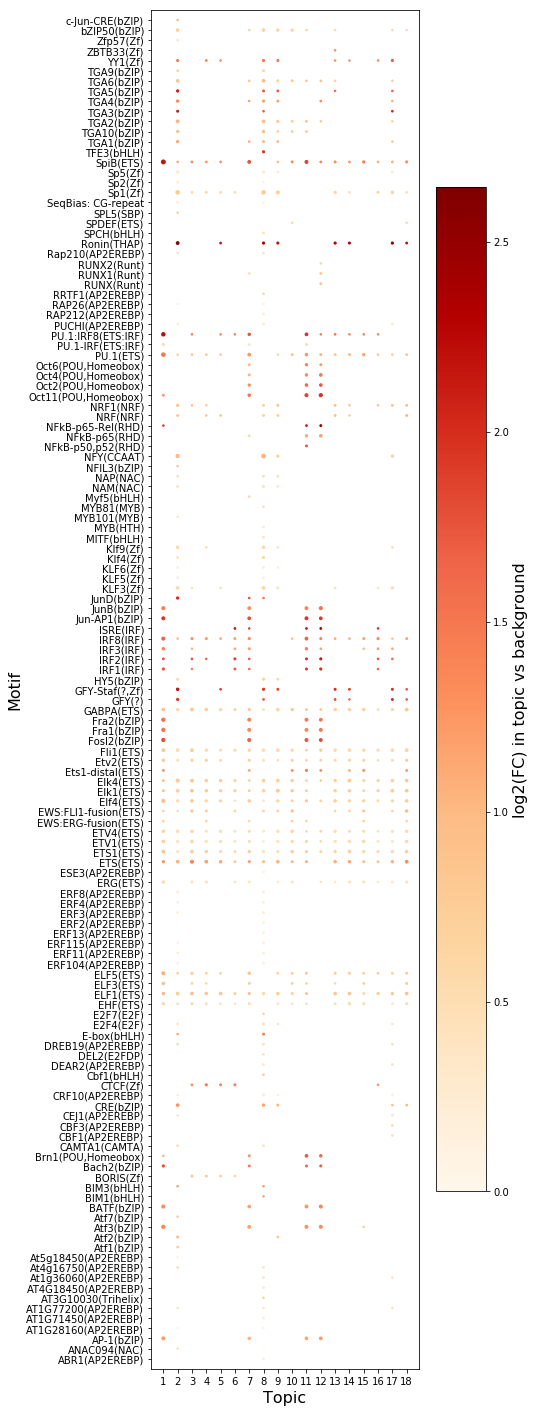

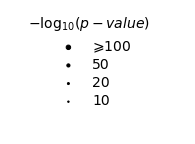

In [29]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig1 = plt.figure(figsize=[6,25])
ax1 = plt.subplot(111)

x = x_coord # celltype+condition variable (6 total)
y = y_coord # topics

c = colors  # color of points
s = sizes  # size of points

#plt.title('|\u0394''(Normalised AUC score)| between CVID and control',fontsize=16)

im1 = ax1.scatter(x, y, c=c, s=s, cmap='OrRd')

# Add a colorbar
cbar = plt.colorbar(im1, ax=ax1)

cbar.set_label('log2(FC) in topic vs background',fontsize=16)

# set the color limits - not necessary here, but good to know how.
im1.set_clim(min(colors), max(colors))

plt.xlabel('Topic',fontsize=16)
plt.ylabel('Motif',fontsize=16)

plt.xticks(tuple([i for i in range(1,19)]), topics)
plt.yticks(tuple([i+1 for i in range(y_dim)]), list(mtf_mtx_pvals.index))

#plt.xlim(0.4, 3.6)
plt.ylim(0, y_dim+1)


fig2 = plt.figure(figsize=[3,2])
ax2 = plt.subplot()

x_dots = [1,1,1,1]
y_dots = [1,2,3,4]

im2 = ax2.scatter(x_dots, y_dots, c='black', s=dot_sizes, cmap='YlOrRd')

plt.text(1.1,0.8,'10',fontsize=14)
plt.text(1.1,1.8,'20',fontsize=14)
plt.text(1.1,2.8,'50',fontsize=14)
plt.text(1.1,3.8,r'$\geqslant 100$',fontsize=14)

plt.text(0.83, 5.1, r'$-\log_{10} (p-value)$', fontsize=14)

plt.axis('off')

plt.xlim(0.8, 1.5)
plt.ylim(0, 6)

#plt.show()


import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("./figures/cisTopic_dotplot_motifs_all.pdf")
for fig in [fig1, fig2]: ## will open an empty extra figure :(
    pdf.savefig(fig, bbox_inches='tight')
pdf.close()

______

In [30]:
# generating it only for certain motifs of interest and topics in 5th and 95th percentile of diff AUC score - 4,5,6 and 2,7,8
cvid_depl_mtf_mtx_pvals = mtf_mtx_pvals.loc[['c-Jun-CRE(bZIP)','bZIP50(bZIP)',
                                                       'TGA9(bZIP)', 'TGA4(bZIP)', 'TGA3(bZIP)',
                                                       'TGA10(bZIP)', 'TGA1(bZIP)', 'JunD(bZIP)',
                                                       'Atf7(bZIP)', 'Atf2(bZIP)', 'Atf1(bZIP)',
                                                       'CRE(bZIP)', 'HY5(bZIP)', 'NFIL3(bZIP)',
                                                       'BIM3(bHLH)', 'BIM1(bHLH)', 'TFE3(bHLH)',
                                                       'SPCH(bHLH)', 'E-box(bHLH)', 'Myf5(bHLH)',
                                                       'MITF(bHLH)', 'Cbf1(bHLH)', 'MYB81(MYB)',
                                                       'MYB101(MYB)', 'E2F7(E2F)', 'E2F4(E2F)',
                                                       'DEL2(E2FDP)', 'NFY(CCAAT)', 'PU.1-IRF(ETS:IRF)',
                                                       'MYB(HTH)', 'Zfp57(Zf)', 'Sp5(Zf)', 'Sp2(Zf)',
                                                       'Klf4(Zf)', 'KLF6(Zf)', 'KLF5(Zf)'],['2','7','8']]


In [31]:
cvid_depl_mtf_mtx_pvals.head()

,2,7,8
c-Jun-CRE(bZIP),13.0,-0.0,-0.0
bZIP50(bZIP),30.0,13.0,30.0
TGA9(bZIP),17.0,-0.0,18.0
TGA4(bZIP),26.0,12.0,22.0
TGA3(bZIP),20.0,-0.0,13.0


In [32]:
# generating it only for certain motifs of interest and topics in 5th and 95th percentile of diff AUC score - 4,5,6 and 2,7,8
cvid_depl_mtf_mtx_scores = mtf_mtx_scores.loc[['c-Jun-CRE(bZIP)','bZIP50(bZIP)',
                                                       'TGA9(bZIP)', 'TGA4(bZIP)', 'TGA3(bZIP)',
                                                       'TGA10(bZIP)', 'TGA1(bZIP)', 'JunD(bZIP)',
                                                       'Atf7(bZIP)', 'Atf2(bZIP)', 'Atf1(bZIP)',
                                                       'CRE(bZIP)', 'HY5(bZIP)', 'NFIL3(bZIP)',
                                                       'BIM3(bHLH)', 'BIM1(bHLH)', 'TFE3(bHLH)',
                                                       'SPCH(bHLH)', 'E-box(bHLH)', 'Myf5(bHLH)',
                                                       'MITF(bHLH)', 'Cbf1(bHLH)', 'MYB81(MYB)',
                                                       'MYB101(MYB)', 'E2F7(E2F)', 'E2F4(E2F)',
                                                       'DEL2(E2FDP)', 'NFY(CCAAT)', 'PU.1-IRF(ETS:IRF)',
                                                       'MYB(HTH)', 'Zfp57(Zf)', 'Sp5(Zf)', 'Sp2(Zf)',
                                                       'Klf4(Zf)', 'KLF6(Zf)', 'KLF5(Zf)'],['2','7','8']]


In [33]:
cvid_depl_mtf_mtx_scores

,2,7,8
c-Jun-CRE(bZIP),0.957726,0.000000,0.000000
bZIP50(bZIP),0.755488,0.658658,0.742916
TGA9(bZIP),0.594481,0.000000,0.594315
TGA4(bZIP),1.360284,1.176786,1.205484
TGA3(bZIP),2.100047,0.000000,1.709118
TGA10(bZIP),0.957606,0.000000,0.965713
TGA1(bZIP),1.156251,1.060138,1.001856
JunD(bZIP),2.026472,1.808506,1.487172
Atf7(bZIP),0.730652,0.000000,0.000000
Atf2(bZIP),1.006854,0.000000,0.000000


In [34]:
# generating it only for certain motifs of interest and topics in 5th and 95th percentile of diff AUC score - 4,5,6 and 2,7,8
cvid_enr_mtf_mtx_pvals = mtf_mtx_pvals.loc[['CTCF(Zf)','BORIS(Zf)'],['4','5','6']]


In [35]:
cvid_enr_mtf_mtx_scores = mtf_mtx_scores.loc[['CTCF(Zf)','BORIS(Zf)'],['4','5','6']]


In [36]:
cvid_enr_mtf_mtx_pvals

,4,5,6
CTCF(Zf),23.0,19.0,20.0
BORIS(Zf),18.0,14.0,12.0


In [37]:
cvid_enr_mtf_mtx_scores

,4,5,6
CTCF(Zf),1.489679,1.371504,1.458021
BORIS(Zf),0.828337,0.771233,0.745966


In [38]:
# 3 groups
x_dim_cvid_enr = cvid_enr_mtf_mtx_scores.shape[1]

# 2 motifs
y_dim_cvid_enr = cvid_enr_mtf_mtx_scores.shape[0]

In [39]:
x_coord_cvid_enr = [[i+1 for i in range(x_dim_cvid_enr)] for j in range(y_dim_cvid_enr)]
x_coord_cvid_enr = [item for sublist in x_coord_cvid_enr for item in sublist]

y_coord_cvid_enr = [[i+1]*x_dim_cvid_enr for i in range(y_dim_cvid_enr)]

In [40]:
colors_cvid_enr = []
for motif in list(cvid_enr_mtf_mtx_scores.index):
    colors_cvid_enr.append(list(cvid_enr_mtf_mtx_scores.loc[motif,:]))
    
# flatten this list
colors_cvid_enr = [item for sublist in colors_cvid_enr for item in sublist]   

In [41]:
sizes_cvid_enr = []
for motif in list(cvid_enr_mtf_mtx_pvals.index):
    for condition in list(cvid_enr_mtf_mtx_pvals.columns):
        sizes_cvid_enr.append(cvid_enr_mtf_mtx_pvals.loc[motif,condition])
        

In [42]:
max(colors_cvid_enr)

1.4896788050222636

In [43]:
sizes_cvid_enr

[23.0, 19.0, 20.0, 18.0, 14.0, 12.0]

In [44]:
dot_sizes = [elem for elem in [10, 20, 50, 100]]

In [45]:
max(colors_cvid_enr)

1.4896788050222636

In [46]:
min(colors_cvid_enr)

0.745965592417158

In [47]:
# now preparing CIVD depleted business


In [48]:
# 3 groups
x_dim_cvid_depl = cvid_depl_mtf_mtx_scores.shape[1]

# 36 motifs
y_dim_cvid_depl = cvid_depl_mtf_mtx_scores.shape[0]

In [49]:
y_dim_cvid_depl

36

In [50]:
x_coord_cvid_depl = [[i+1 for i in range(x_dim_cvid_depl)] for j in range(y_dim_cvid_depl)]
x_coord_cvid_depl = [item for sublist in x_coord_cvid_depl for item in sublist]

y_coord_cvid_depl = [[i+1]*x_dim_cvid_depl for i in range(y_dim_cvid_depl)]

In [51]:
colors_cvid_depl = []
for motif in list(cvid_depl_mtf_mtx_scores.index):
    colors_cvid_depl.append(list(cvid_depl_mtf_mtx_scores.loc[motif,:]))
    
# flatten this list
colors_cvid_depl = [item for sublist in colors_cvid_depl for item in sublist]   

In [52]:
sizes_cvid_depl = []
for motif in list(cvid_depl_mtf_mtx_pvals.index):
    for condition in list(cvid_depl_mtf_mtx_pvals.columns):
        sizes_cvid_depl.append(cvid_depl_mtf_mtx_pvals.loc[motif,condition])
        

In [53]:
max(colors_cvid_depl)

2.10004717685033

In [54]:
dot_sizes = [elem for elem in [10, 20, 50, 100]]

In [55]:
max(colors_cvid_depl)

2.10004717685033

In [56]:
min(colors_cvid_depl)

0.0

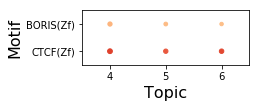

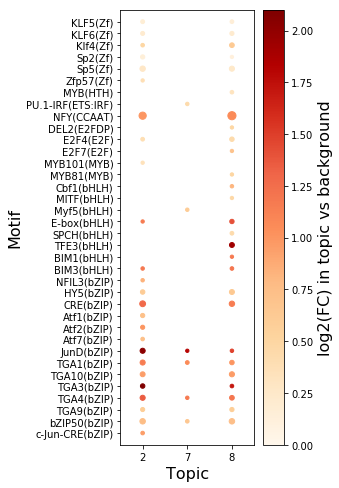

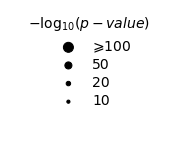

In [57]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig1 = plt.figure(figsize=[3,1])
ax1 = plt.subplot(111)

x = x_coord_cvid_enr # celltype+condition variable (6 total)
y = y_coord_cvid_enr # topics

c = colors_cvid_enr  # color of points
s = sizes_cvid_enr  # size of points

#plt.title('|\u0394''(Normalised AUC score)| between CVID and control',fontsize=16)

im1 = ax1.scatter(x, y, c=c, s=s, cmap='OrRd')

# Add a colorbar
#cbar = plt.colorbar(im1, ax=ax1)

#cbar.set_label('log2(FC) in topic vs background',fontsize=16)

# set the color limits - not necessary here, but good to know how.
im1.set_clim(0, max(colors_cvid_depl)) # because the range in depleted is bigger

plt.xlabel('Topic',fontsize=16)
plt.ylabel('Motif',fontsize=16)

plt.xticks(tuple([i for i in range(1,4)]), [4,5,6])
plt.yticks(tuple([i+1 for i in range(y_dim_cvid_enr)]), list(cvid_enr_mtf_mtx_scores.index))

plt.xlim(0.5, 3.5)
plt.ylim(0.5, y_dim_cvid_enr+0.5)

#plt.savefig('dotplot_motifs_18_topics.pdf',bbox_inches='tight')


fig2 = plt.figure(figsize=[3,8])
ax2 = plt.subplot(111)


x = x_coord_cvid_depl # celltype+condition variable (6 total)
y = y_coord_cvid_depl # topics

c = colors_cvid_depl  # color of points
s = sizes_cvid_depl  # size of points

#plt.title('|\u0394''(Normalised AUC score)| between CVID and control',fontsize=16)

im1 = ax2.scatter(x, y, c=c, s=s, cmap='OrRd')

# Add a colorbar
cbar = plt.colorbar(im1, ax=ax2)

cbar.set_label('log2(FC) in topic vs background',fontsize=16)

# set the color limits - not necessary here, but good to know how.
im1.set_clim(0, max(colors_cvid_depl))

plt.xlabel('Topic',fontsize=16)
plt.ylabel('Motif',fontsize=16)

plt.xticks(tuple([i for i in range(1,4)]), [2,7,8])
plt.yticks(tuple([i+1 for i in range(y_dim_cvid_depl)]), list(cvid_depl_mtf_mtx_scores.index))

plt.xlim(0.5, 3.5)
plt.ylim(0, y_dim_cvid_depl+1)


fig3 = plt.figure(figsize=[3,2])
ax3 = plt.subplot()

x_dots = [1,1,1,1]
y_dots = [1,2,3,4]

im2 = ax3.scatter(x_dots, y_dots, c='black', s=dot_sizes, cmap='YlOrRd')

plt.text(1.1,0.8,'10',fontsize=14)
plt.text(1.1,1.8,'20',fontsize=14)
plt.text(1.1,2.8,'50',fontsize=14)
plt.text(1.1,3.8,r'$\geqslant 100$',fontsize=14)

plt.text(0.83, 5.1, r'$-\log_{10} (p-value)$', fontsize=14)

plt.axis('off')

plt.xlim(0.8, 1.5)
plt.ylim(0, 6)

#plt.savefig('dotplot_motifs_pval_18_topics.pdf',bbox_inches='tight')

plt.show()


import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("./figures/cisTopic_dotplot_motifs_selected.pdf")
for fig in [fig1, fig2, fig3]: ## will open an empty extra figure :(
    pdf.savefig(fig, bbox_inches='tight')
pdf.close()